# PS.0 (harmonic series)

The harmonic series satisfies 

\begin{equation}
 \sum_{k=1}^n \frac{1}{k} \rightarrow \infty.
\end{equation}

a) Write a function $n\mapsto harmonicSum(n)$ that returns $\sum_{k=1}^n \frac{1}{k}$. 

b) Plot this function between $10<n<10^6$.


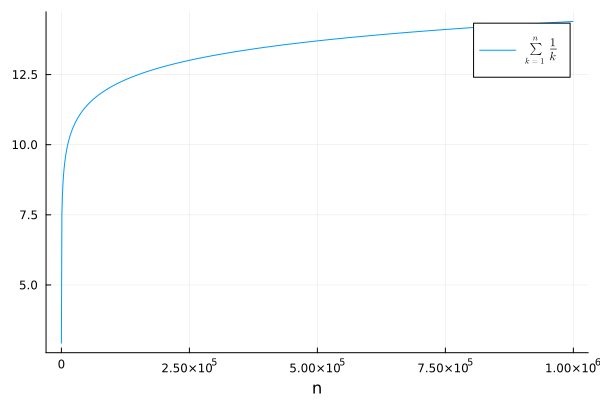

In [1]:
harmonicSum(n) = sum(1/k for k in 1:n)
using Plots, LaTeXStrings
n = 1e1:1e3:1e6
plot(n,harmonicSum.(n),label=L"\sum_{k=1}^n \frac{1}{k}", xlabel="n")  # does not really look unbounded, does it?

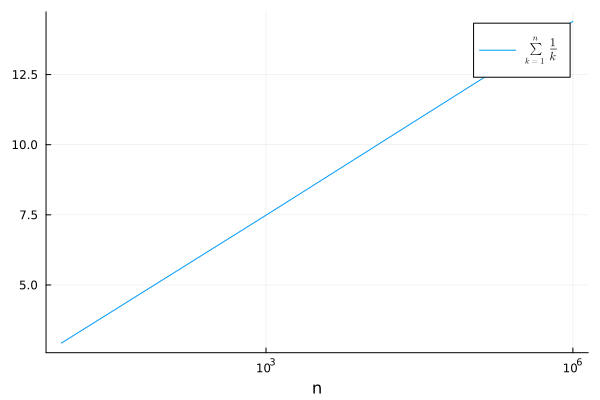

In [2]:
plot(n,harmonicSum.(n),xaxis=:log,label=L"\sum_{k=1}^n \frac{1}{k}", xlabel="n")

# PS.0 (alternate harmonic series)
    
The alternate harmonic series satisfies    
    
\begin{equation}
 \lim_{n\rightarrow\infty}\sum_{k=1}^n \frac{(-1)^{k+1}}{k} = \ln(2).
\end{equation}

a)  Write a function $n\mapsto harmonicAlternateSum(n)$ that returns $\sum_{k=1}^n \frac{(-1)^{k+1}}{k}$. 

b) Check numerically if
\begin{equation}
\frac{\left|\sum_{k=1}^{n+1} \frac{(-1)^{k+1}}{k} - \ln(2)\right| }{\left|\sum_{k=1}^n \frac{(-1)^{k+1}}{k} - \ln(2)\right|} \rightarrow 1
\end{equation}

c) Check numerically if 

\begin{equation}
\lim_{n\rightarrow\infty} \left|\sum_{k=1}^n \frac{(-1)^{k+1}}{k}-\ln(2) \right|^{1/n} =1
\end{equation}

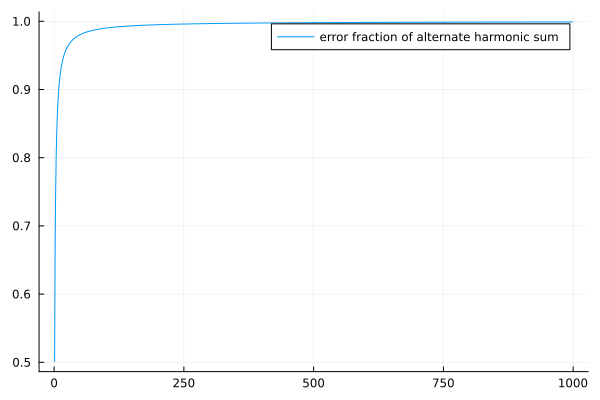

In [3]:
harmonicAlternateSum(n) = sum((-1)^(k+1)/k for k in 1:n)
m = 1e2:1e2:1e5
error = abs.(harmonicAlternateSum.(m).-log(2))
plot(error[2:end]./error[1:end-1],label="error fraction of alternate harmonic sum")

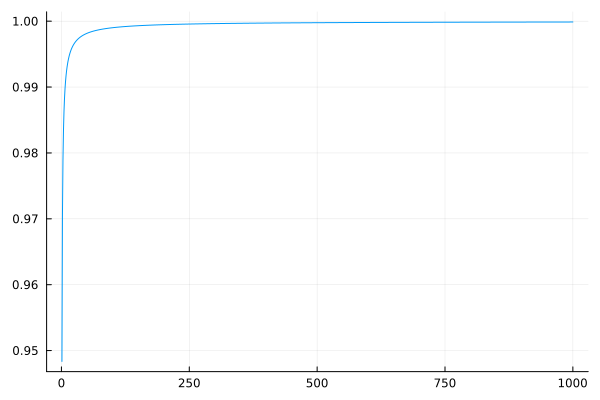

In [4]:
plot(error.^(1 ./m),label="")

# PS.0 (p-q-formula)

The p-q-formula of quadratic equations leads to

\begin{equation}
x^2-2px+q = 0,\qquad\qquad
x_{1/2}  = p\pm\sqrt{p^2-q}.
\end{equation}

a) Write a function $(p,q)\mapsto myPQnaive(p,q)$ that returns the zeros $x_1$ and $x_2$. 

b) nothing to do here (in a few weeks we will have learned why a) is too naive and how to do better)

In [5]:
function myPQnaive(p,q)   
    s = sqrt(p^2-q)
    x1 = p + s
    x2 = p - s
    return x1,x2
end

myPQnaive(3/2,2)

(2.0, 1.0)

# PS.0 (vector of matrices) 

Given $v_1,\ldots v_m\in\mathbb{R}^{n\times n}$, consider 

$$
s = v_1+\ldots+v_m,\qquad p = v_1\cdots v_m.
$$

a) Assume that $v$ is a length $m$ (julia-)vector of $n\times n$ matrices. Write a function $v\mapsto mySumProd(v)$ that returns the sum $s$ and the product $p$ all matrices. 

b) Test your function $𝑚𝑦𝑆𝑢𝑚𝑃𝑟𝑜𝑑$

In [6]:
mySumProd(v) = sum(v),prod(v)

using Test, LinearAlgebra
@testset "myTests" begin     
       v = []
       for k in 1:10
           A = randn(20,20) 
           push!(v,A,-A,inv(A),-inv(A))
       end
       s,p = mySumProd(v)
       
       @test norm(s) < 1e-323
       @test norm(p-I) < 1e-11
end

Test Summary: | Pass  Total  Time
myTests       |    2      2  1.2s


Test.DefaultTestSet("myTests", Any[], 2, false, false, true, 1.665837893810178e9, 1.665837895028049e9)

# PS.0 (Fibonacci)

The Fibonacci sequence $(a_n)_{n\in\mathbb{N}}$ satisfies 

$$
a_{n+1} = a_{n}+a_{n-1},\qquad a_1=1,\quad a_0=0.
$$

a) Write a recursive function $n\mapsto myFibo(n)$ that returns the $n$-th Fibonacci number $a_n$.

b) Write a function $n\mapsto myFiboVector(n)$ that returns the vector of the first $n+1$ Fibonacci numbers $(a_0,\ldots,a_{n})^\top$. 

In [7]:
function myFiboVector(n)    # vector of length n+1
    if n == 0 return [0] end
    if n == 1 return [0,1] end
    a = myFiboVector(n-1)
    a = push!(a, a[n]+a[n-1])   # a_(n+1) = a_n+a_(n-1)
    return a
end

@show myFiboVector(11);

myFiboVector(11) = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


In [8]:
myFibo(n) = myFiboVector(n)[n+1]
@show myFibo(11);

myFibo(11) = 89
